In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

import os
import csv

os.getenv("PUIDATA")

df = pd.read_csv(os.getenv("PUIDATA") + "/citibike" +'/201707-citibike-tripdata.csv')
df1 = pd.read_csv(os.getenv("PUIDATA") + "/citibike" +'/201706-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/citibike" +'/201705-citibike-tripdata.csv')

# pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [3]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [4]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,254,2017-05-01 00:00:13,2017-05-01 00:04:27,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,27695,Subscriber,1996.0,2
1,248,2017-05-01 00:00:19,2017-05-01 00:04:28,511,E 14 St & Avenue B,40.729387,-73.977724,394,E 9 St & Avenue C,40.725213,-73.977688,15869,Subscriber,1996.0,1
2,1120,2017-05-01 00:00:19,2017-05-01 00:19:00,242,Carlton Ave & Flushing Ave,40.697787,-73.973736,3083,Bushwick Ave & Powers St,40.712477,-73.941000,18700,Subscriber,1985.0,2
3,212,2017-05-01 00:00:24,2017-05-01 00:03:56,168,W 18 St & 6 Ave,40.739713,-73.994564,116,W 17 St & 8 Ave,40.741776,-74.001497,24981,Subscriber,1993.0,1
4,686,2017-05-01 00:00:29,2017-05-01 00:11:55,494,W 26 St & 8 Ave,40.747348,-73.997236,527,E 33 St & 2 Ave,40.744023,-73.976056,25407,Subscriber,1964.0,1


In [5]:
df.shape

(1735599, 15)

In [6]:
df1.shape

(1731594, 15)

In [7]:
df = df.append(df1)

In [8]:
df = df.append(df2)

In [9]:
df.shape

(4990461, 15)

IDEA:
Women has short trip duration of usage of citibike than men.

NULL HYPOTHESIS:

The women's trip duration that use of citi-bike is the same or higher than the men's trip duration of usage of the bike.

_$H_0$_ : $\frac{F_{Wd}}{W_{n}} < \frac{F_{Md}}{M_{n}} $ 

_$H_1$_ : $\frac{F_{Wd}}{W_{n}} >= \frac{F_{Md}}{M_{n}} $ 

where $F_{Wd}$ is Frequency of Women trip duration, $F_{Md}$ is Frequency of Men trip duration, ${W_{n}}$ is total number of Women, and ${M_{m}}$ is total number of Men

or identically:

_$H_0$_ : $\frac{F_{Wd}}{W_{n}} - \frac{F_{Md}}{M_{n}} $ < 0

_$H_1$_ : $\frac{F_{Wd}}{W_{n}} - \frac{F_{Md}}{M_{n}} $ >= 0

# I will use a significance level  $\alpha=0.05$

### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [11]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype','birth year'], axis=1, inplace=True)

In [12]:
df.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [13]:
# outliner(>0.95) of the data is cleaned

In [14]:
df.tripduration.quantile(0.95)

2134.0

In [15]:
df3 = df[df.tripduration < df.tripduration.quantile(0.95)]

In [16]:
df3.head(5)

,tripduration,gender
0,364,1
2,328,2
5,545,2
6,1496,1
7,1495,2


In [17]:
df3.shape

(4740824, 2)

### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female

### Lets plot the frequency over tripduration(s)

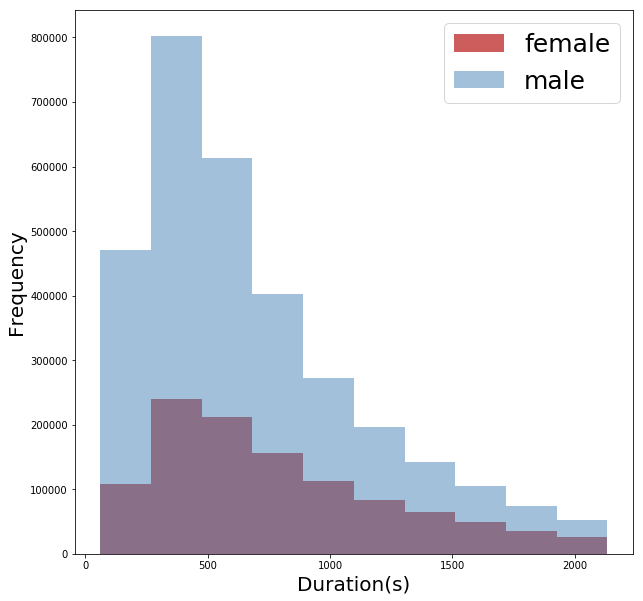

In [18]:
fig = pl.figure(figsize(10,10))

(df3[df3['gender']==2]['tripduration']).plot(bins = 10, kind="hist", color = 'IndianRed',label='female')

(df3[df3['gender'] == 1]['tripduration']).plot(bins = 10,kind="hist", color= 'SteelBlue',label='male',alpha =0.5)

pl.legend(fontsize=25)
pl.xlabel('Duration(s)', fontsize=20)
pl.ylabel('Frequency',fontsize=20)
pl.show()

## Fig.1 Histograme of trip duration against men and women in May, June, July, 2017 with bins

#### Let's normalized it

In [34]:
Wt = df3[df3['gender']==2].gender.shape[0]

In [35]:
Mt =df3[df3['gender']==1].gender.shape[0]

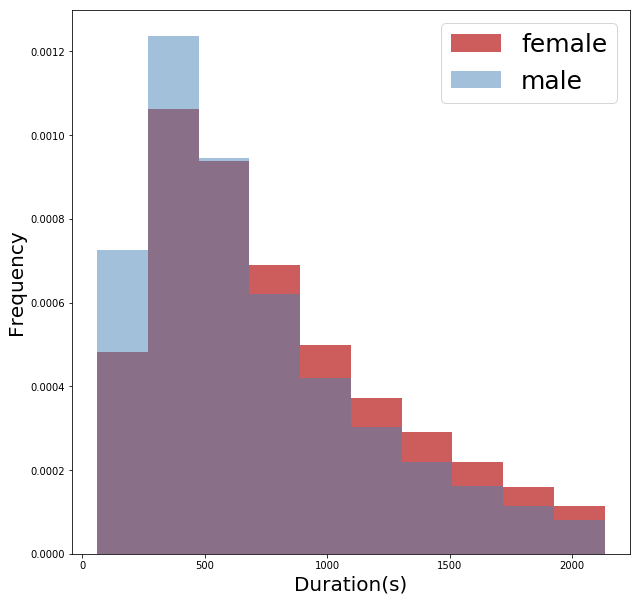

In [37]:
fig = pl.figure(figsize(10,10))

(df3[df3['gender']==2]['tripduration']).plot(bins = 10, kind="hist", normed= Wt ,color = 'IndianRed',label='female')

(df3[df3['gender'] == 1]['tripduration']).plot(bins = 10,kind="hist",normed=Mt ,color= 'SteelBlue',label='male',alpha =0.5)

pl.legend(fontsize=25)
pl.xlabel('Duration(s)', fontsize=20)
pl.ylabel('Frequency',fontsize=20)
pl.show()

#### Fig2. Normalized Histogram of trip duration against men and women in May, June, July, 2017 with bins

### Z - test